In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [9]:
import arviz as az

In [2]:
data = pd.read_table('tulips.txt', sep = ';')

In [3]:
data.head()

,bed,water,shade,blooms
0,a,1,1,0.00
1,a,1,2,0.00
2,a,1,3,111.04
3,a,2,1,183.47
4,a,2,2,59.16


In [4]:
data['blooms_std'] = data['blooms'] / data['blooms'].max()

In [5]:
data['water_cent'] = data['water'] - data['water'].mean()
data['shade_cent'] = data['shade'] - data['shade'].mean()

In [6]:
with pm.Model() as model_1:
    a = pm.Normal('a', 0.5, 0.25)
    b_w = pm.Normal('b_w', 0, 0.25)
    b_s = pm.Normal('b_s', 0, 0.25)
    b_w_s = pm.Normal('b_w_s', 0, 0.25)
    sigma = pm.Exponential('sigma', 1)
    blooms_mean = pm.Deterministic('blooms_mean', a + b_w * data['water_cent'] 
                                   + b_s * data['shade_cent'] + b_w_s * data['shade_cent'] * data['water_cent'])
    
    blooms_pred = pm.Normal('blooms_pred', blooms_mean, sigma, observed=data['blooms_std'])
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_w_s, b_s, b_w, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


/Users/atao/opt/anaconda3/envs/statisticalRethinking/lib/python3.9/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b_w'}>,
        <AxesSubplot:title={'center':'b_w'}>],
       [<AxesSubplot:title={'center':'b_s'}>,
        <AxesSubplot:title={'center':'b_s'}>],
       [<AxesSubplot:title={'center':'b_w_s'}>,
        <AxesSubplot:title={'center':'b_w_s'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'blooms_mean'}>,
        <AxesSubplot:title={'center':'blooms_mean'}>]], dtype=object)

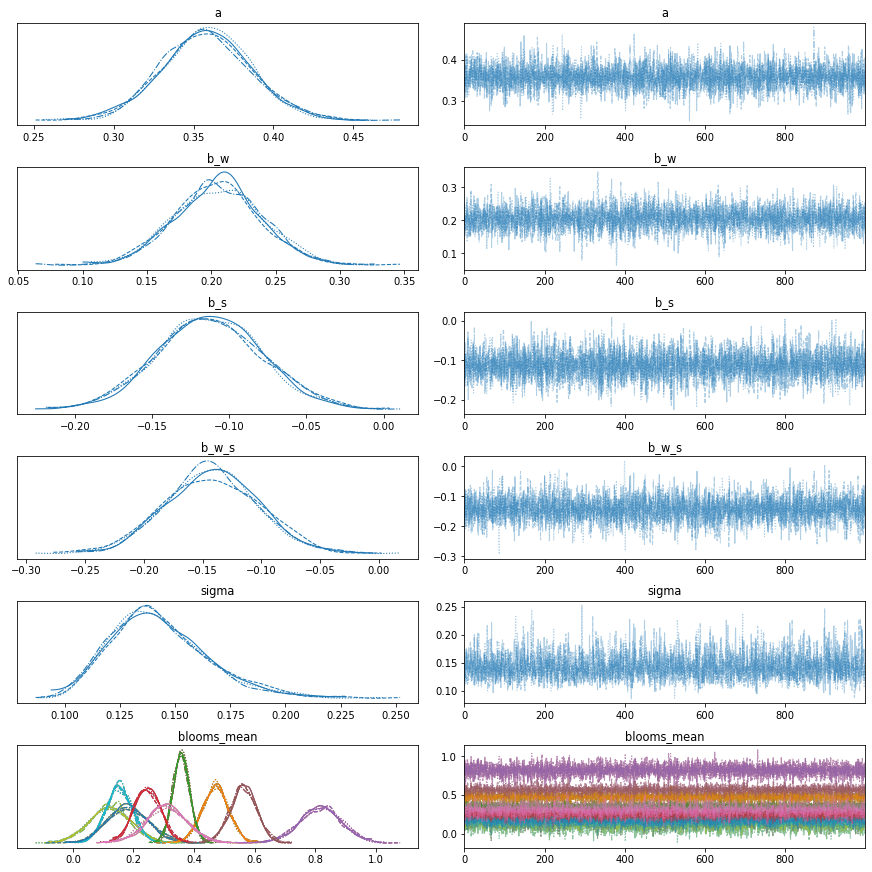

In [10]:
az.plot_trace(trace)